# Telecom Customer Churn Analysis


In this notebook, I have analyzed the telecom customer data for predciting churning customer. I have performed explratory data analysis on the data to understand the distributions and statistical relationship among various variables. Also, I have tried to build 

# 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# 2. Importing Dataset

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Variables


* gender            :  Whether the customer is a male or a female     
* SeniorCitizen     :  Whether the customer is a senior citizen or not (1, 0)
* Partner           :  Whether the customer has a partner or not (Yes, No)
* Dependents        :  Whether the customer has dependents or not (Yes, No)
* tenure            :  Number of months the customer has stayed with the company
* PhoneService      :  Whether the customer has a phone service or not (Yes, No)
* MultipleLines     :  Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService   :  Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity    :  Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup      :  Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection  :  Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport       :  Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV       :  Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies   :  Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract          :  The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling  :  Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod     :  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges    :  The amount charged to the customer monthly
* TotalCharges      :  The total amount charged to the customer
* Churn             :  Whether the customer churned or not (Yes or No)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Type of variables
 
1. Categorical Variables:   ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

2.  Numerical Variables:   ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

### categorization of variables

We can also categorize variable based on their properties and characteristic values.

1. Demographic variables : ['gender', 'Senior Citizen', 'Partner', 'Dependents']
2. Customer Account variables : ['Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod' ] 
3. Services used by customers : ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# 3. Data Cleaning

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
df.TotalCharges.dtype

dtype('float64')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The instances with missing TotalCharges values have 0 as tenure period. Total of 11 rows have missing values which is a very small proportion of dataset. So, these rows can be dropped.

In [9]:
#Dropping null values
df.dropna(inplace=True)

In [10]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [11]:
df['Churn'].replace(to_replace={'Yes': 1, 'No': 0}, inplace=True)

# 4. Exploratory Data Analysis

#### 1. Demographic Variables

- *Gender*

Male      0.504693
Female    0.495307
Name: gender, dtype: float64


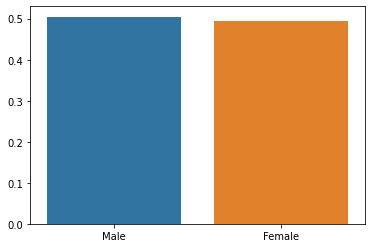

In [12]:
relative = df['gender'].value_counts(normalize=True)

sns.barplot(x=relative.index, y=relative.values)
print(relative)

- *Age*

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64


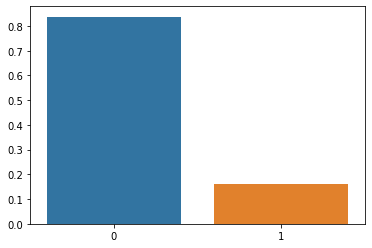

In [13]:
relative = df['SeniorCitizen'].value_counts(normalize=True)
sns.barplot(x=relative.index, y=relative.values);
print(relative)

- *Partner*

No     0.517491
Yes    0.482509
Name: Partner, dtype: float64


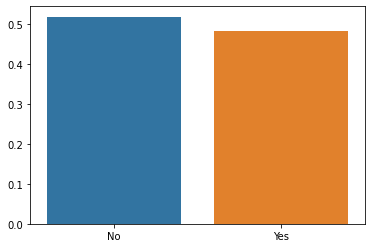

In [14]:
relative = df['Partner'].value_counts(normalize=True)
sns.barplot(x=relative.index, y=relative.values)
print(relative)

- *Dependents*

No     0.701507
Yes    0.298493
Name: Dependents, dtype: float64


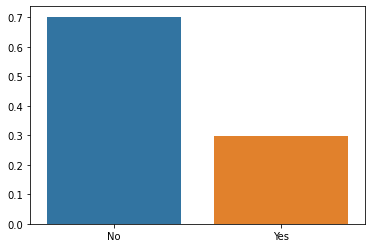

In [15]:
relative = df['Dependents'].value_counts(normalize=True)
sns.barplot(x=relative.index, y=relative.values)
print(relative)

#### 2. Customer Account Information

- *Tenure*

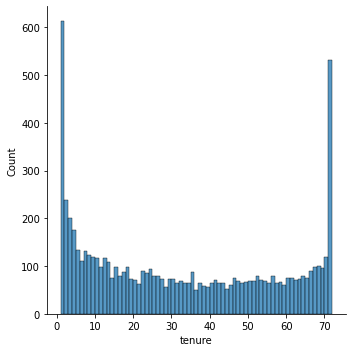

In [16]:
sns.displot(df['tenure'], binwidth= 1)

- *Contract*

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

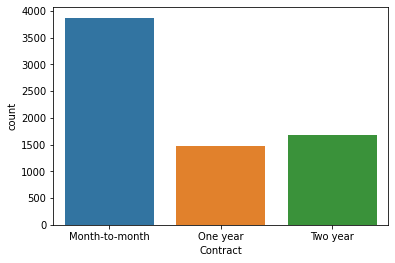

In [17]:
print(df['Contract'].value_counts())
sns.countplot(data=df, x='Contract')

- *Tenure based on contract length*

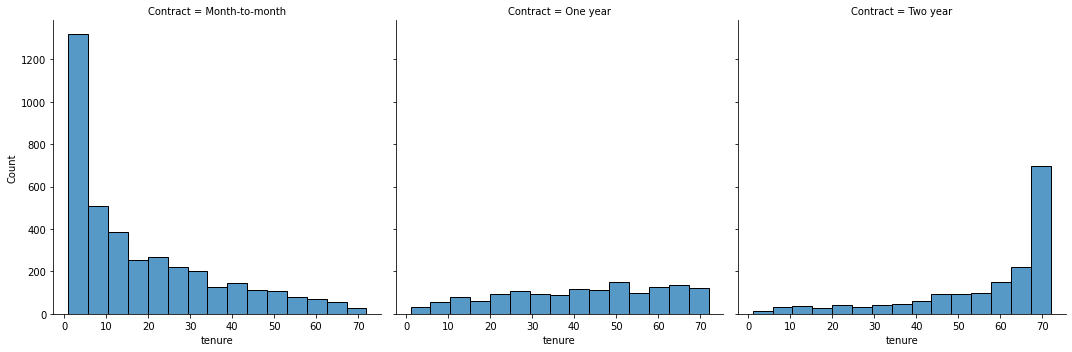

In [18]:
sns.displot(data=df, x='tenure',col='Contract')

#### 3. various services used by customers

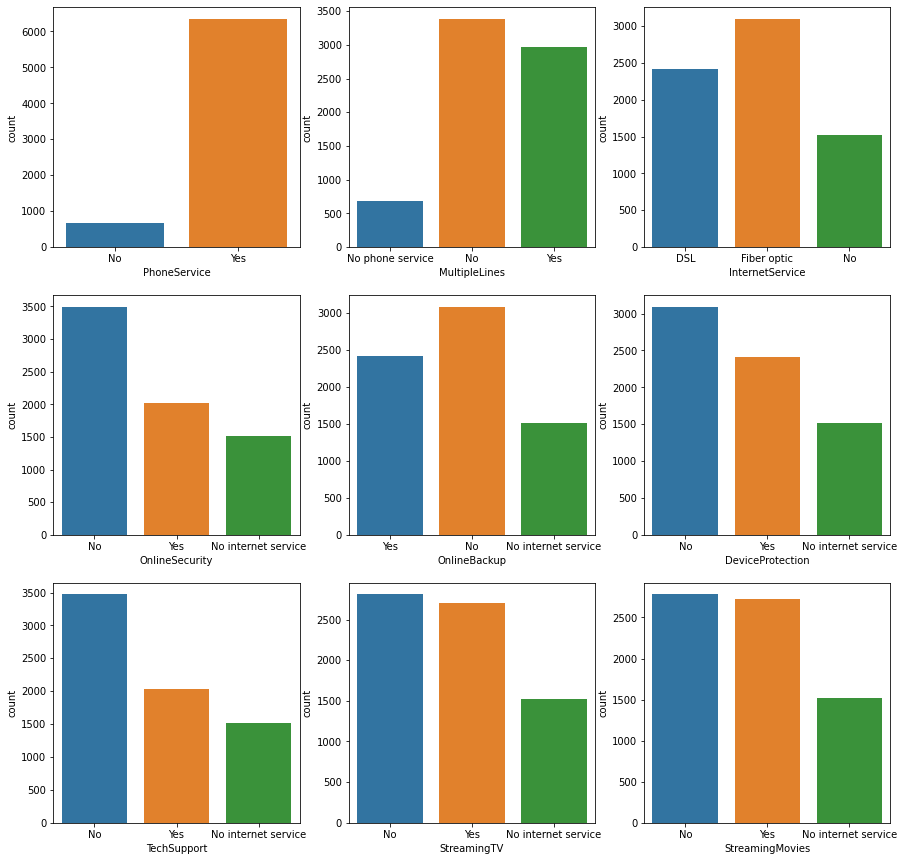

In [19]:
#column with services

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, ax = plt.subplots(3,3, figsize= (15, 15))

for i in range(3):
    for j in range(3):
        sns.countplot(data=df, x=services[3*i+j], ax=ax[i,j])


#### 4. Relationship between Monthly and Total Charges

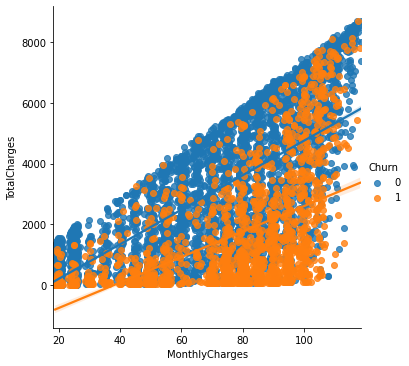

In [20]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

####  5. Churn Rate and its relationship with other features

- *Churn Rate*

0    0.734215
1    0.265785
Name: Churn, dtype: float64
0    5163
1    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

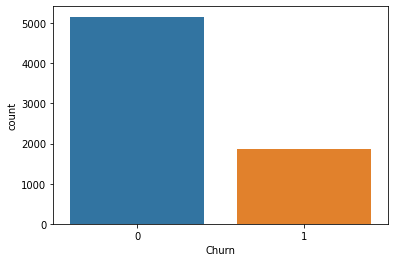

In [21]:
# Churn distribution 

print(df['Churn'].value_counts(normalize=True))

print(df['Churn'].value_counts())

sns.countplot(data=df, x='Churn')

About 26% of total 7000 customer have churned.

- *Churn vs Tenure*

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

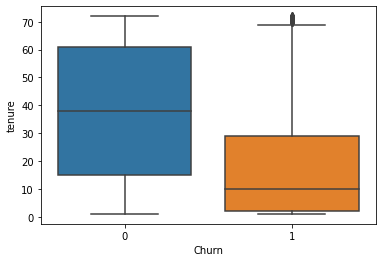

In [22]:
sns.boxplot(data=df, x='Churn', y='tenure')

Customers who do not churn, stay for a longer tenure.

- *Churn by Contract*

<AxesSubplot:xlabel='Contract', ylabel='count'>

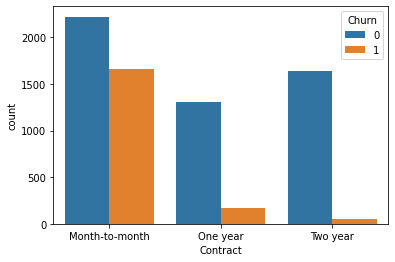

In [23]:
sns.countplot(data=df, x='Contract', hue='Churn')

Customers with month to month contract have a very high churn rate.

- *Churn by Age (SeniorCitizen)*

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

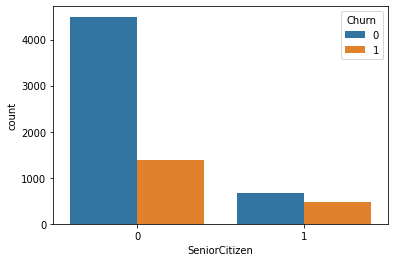

In [24]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

A larger portion of Senior citizen do churn as compared to the  young citizen.

- *Churn by Dependents*

<AxesSubplot:xlabel='Dependents', ylabel='count'>

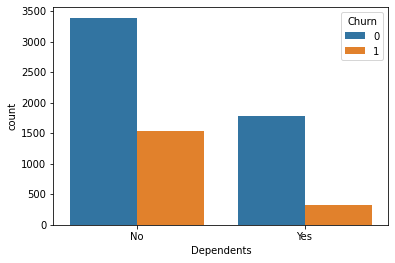

In [25]:
sns.countplot(data=df, x='Dependents', hue='Churn')

- *Churn by Partner*

<AxesSubplot:xlabel='Partner', ylabel='count'>

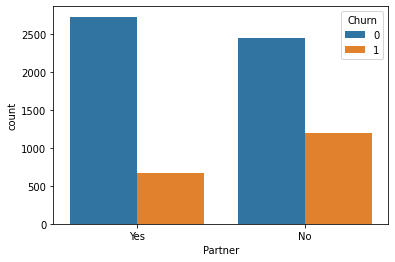

In [26]:
sns.countplot(data=df, x='Partner', hue='Churn')

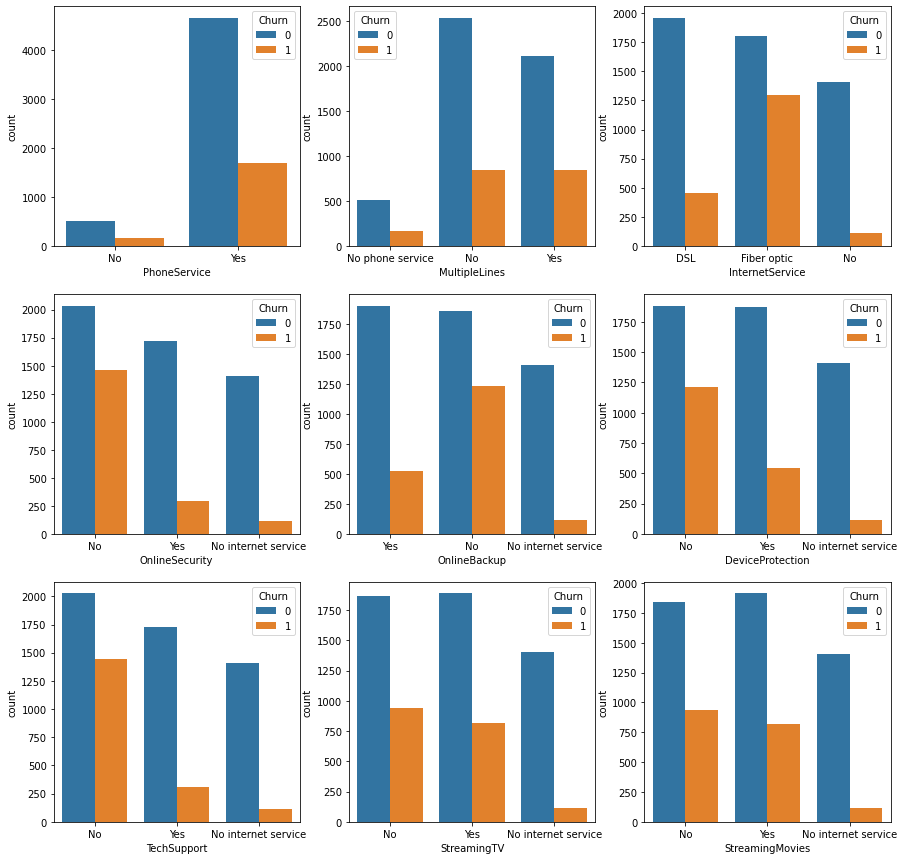

In [27]:
#column with services

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, ax = plt.subplots(3,3, figsize= (15, 15))

for i in range(3):
    for j in range(3):
        sns.countplot(data=df, x=services[3*i+j], ax=ax[i,j], hue='Churn')


- *Churn by Monthly Charges* 

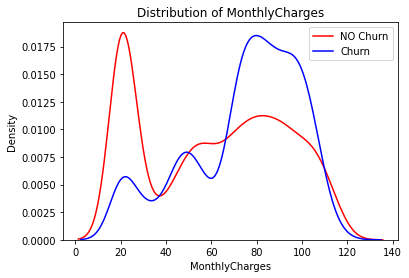

In [28]:
sns.kdeplot(data=df[df['Churn']== 0], x='MonthlyCharges', color='red', label='NO Churn');
sns.kdeplot(data=df[df['Churn']== 1], x='MonthlyCharges', color='blue', label='Churn');
plt.title('Distribution of MonthlyCharges')
plt.legend();

Higher % of customers churn when the monthly charges are high.

- *Churn by Total Charges*

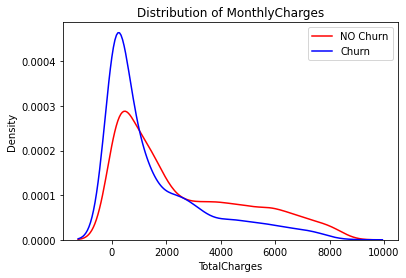

In [29]:
sns.kdeplot(data=df[df['Churn']== 0], x='TotalCharges', color='red', label='NO Churn');
sns.kdeplot(data=df[df['Churn']== 1], x='TotalCharges', color='blue', label='Churn');
plt.title('Distribution of MonthlyCharges')
plt.legend();

It seems there is higer churn when the total charges are lower.

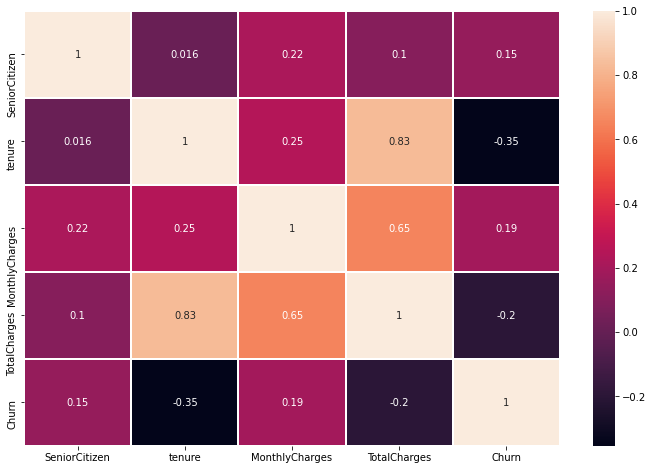

In [30]:
#correlation

plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, linewidths = 2)
plt.show()

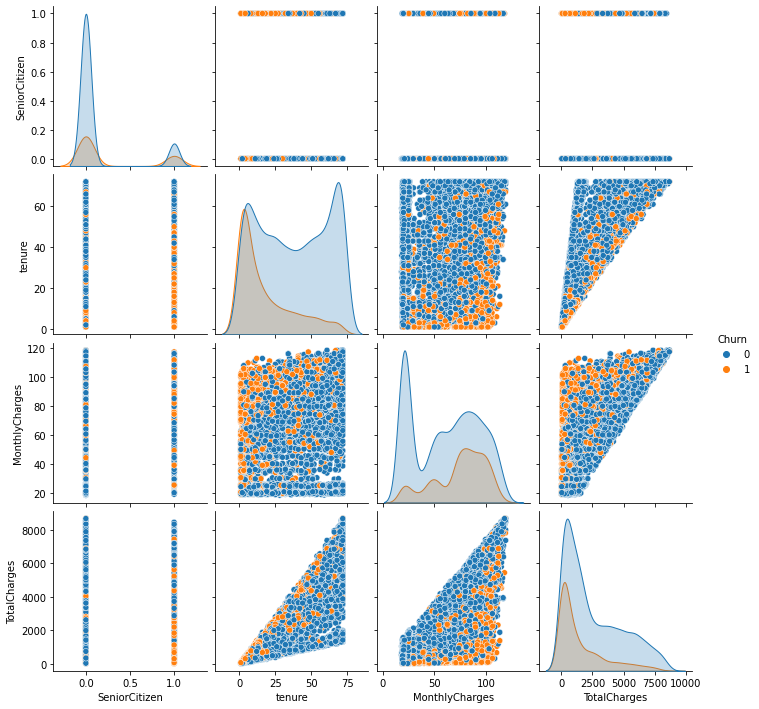

In [32]:
sns.pairplot(df, hue = 'Churn')

In [33]:
df2 = df.drop(columns='customerID')
df_dummies = pd.get_dummies(df2)

## Predictive Modeling

In [34]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [35]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.metrics import classification_report

#### 1. Logistic Regression

In [37]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

#making prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [38]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

#making prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1580
           1       0.50      0.77      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



#### 2. Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
clf_rf.fit(X_train, y_train)

# Making predictions
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.67      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [40]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30, class_weight='balanced')
clf_rf.fit(X_train, y_train)

# Making predictions
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1580
           1       0.50      0.75      0.60       530

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110



#### 3. Support Vector Machine

In [41]:
from sklearn.svm import SVC

clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.63      0.52      0.57       530

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [42]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', class_weight='balanced') 
clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1580
           1       0.43      0.80      0.56       530

    accuracy                           0.69      2110
   macro avg       0.67      0.73      0.66      2110
weighted avg       0.79      0.69      0.71      2110



As the data is imbalanced, standard classifiers produce small value of recall for churn variable. Adding weight to the positive value of churn variable by using balanced class_weight, improves the recall metrics.